#  Project 1: Data Analysis and Visualization with Real-Life Marine Litter Dataset

Now, let's combine everything we have learned so far to work on a real life dataset.

This dataset provides valuable information about marine litter found at the seafloor of the southeastern North Sea. It was collected during scientific research aimed at understanding the distribution and impact of marine litter in this area. Here's a breakdown of the dataset description and its columns:

- **Citation:** The dataset is attributed to Lars Gutow and published by the Alfred Wegener Institute. It is part of a larger study that investigates marine litter in the North Sea. The dataset can be accessed through the provided DOI link (https://doi.org/10.1594/PANGAEA.890785)

- **Location:** The dataset is specific to the North Sea.

- **Campaign:** The specific research campaign under which this data was collected was "HE419".

- **Method/Device:** A beam trawl (BEAM) was used to collect marine litter data from the seafloor.

## Dataset Columns:
- **Station:** This identifies the specific sampling station where the data was collected.
- **Date/Time:** The exact date and time of the sampling at the station.
- **Latitude:** The geographic latitude of the sampling point.
- **Longitude:** The geographic longitude of the sampling point.
- **Elevation [m]:** The depth at which the sampling occurred, measured in meters.
- **Litter obj:** This column likely records the specific litter object(s) found during sampling.
- **Litter cat:** This column categorizes the types of litter objects identified.
- **Litter fish:** This column may provide additional information regarding litter impacts on fish species or related observations.

This dataset is crucial for understanding marine pollution in the North Sea. It documents the types and quantities of litter found at various depths and locations, which can help researchers assess the impact of marine litter on marine ecosystems and contribute to environmental management efforts. The detailed metadata allows for effective spatial and temporal analyses, enabling scientists to track changes over time and identify potential sources of pollution.

Start by **importing the libraries** you will need for the analysis. 

You will use Pandas for data manipulation, NumPy for numerical operations, and Matplotlib and Seaborn for your visualizations:

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now that you have the libraries ready, **load the dataset** (*marine_seafloor_litter.csv*) from the CSV file. 

Display the first few rows and the dataframe's shape, so you can get an idea of what the data looks like:

In [2]:
# Loading the Dataset
# Let's start by loading our dataset.
df = pd.read_csv("data/marine_seafloor_litter.csv")
litter_data = df.copy()

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(litter_data.head())
print(litter_data.shape)

First few rows of the dataset:
         Event Station            Date/Time  Latitude  Longitude  \
0  HE419/004-8      H1   2014-04-03 7:18:00   54.0498     8.0828   
1  HE419/004-8      H1   2014-04-03 7:18:00   54.0498     8.0828   
2  HE419/004-8      H1   2014-04-03 7:18:00   54.0498     8.0828   
3  HE419/007-6     M03  2014-04-03 18:17:00   54.1355     7.0443   
4  HE419/009-5     M05  2014-04-03 23:14:00   54.2122     6.4518   

   Elevation [m]        Litter obj Litter cat Litter fish  
0            -18  plastic fragment   plastics          no  
1            -18     metal texture      metal          no  
2            -18      glass bottle      glass          no  
3            -32         net fiber   plastics         yes  
4            -34         net fiber   plastics         yes  
(271, 9)


Next, check for any **missing values** in the dataframe.

**Hint:** You can use the ***is.null()*** function along with Python’s ***sum()*** function to calculate the total number of missing values in each column.

In [3]:
#Handling Missing Values
# Let's check for any missing values in our dataset.
missing_values = litter_data.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values)


Missing Values in Dataset:
Event             0
Station          26
Date/Time         0
Latitude          0
Longitude         0
Elevation [m]     0
Litter obj        0
Litter cat        0
Litter fish       0
dtype: int64


Now, you can see how many missing values are in each column.

**Handle the missing values** by using the **fillna()** function and check the missing values in the dataframe again:

In [4]:
litter_data['Station'] = litter_data['Station'].fillna('Unknown')
missing_values = litter_data.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values)


Missing Values in Dataset:
Event            0
Station          0
Date/Time        0
Latitude         0
Longitude        0
Elevation [m]    0
Litter obj       0
Litter cat       0
Litter fish      0
dtype: int64


Now, **check for duplicate entries** in your dataset. If you find any, remove them to ensure the analysis is based on unique observations.

Print the number of duplicated rows, and display the dataframe’s shape before and after removing duplicates to verify the operation was successful.

**Hint:** You can use Python’s **sum()** function together with the function we learned in class to identify duplicates to count the total number of duplicated rows.

In [5]:
# Handling Duplicates
# We should also check for any duplicate entries in our dataset.
duplicates = litter_data.duplicated().sum()
print("\nNumber of duplicate entries:", duplicates)
print("\nData before dropping duplicates:",litter_data.shape)


# Dropping duplicates from our dataset
litter_data = litter_data.drop_duplicates(keep='first')
print("\nData after dropping duplicates:")
print(litter_data.shape)


Number of duplicate entries: 156

Data before dropping duplicates: (271, 9)

Data after dropping duplicates:
(115, 9)


Now, **handle the outliers** in the dataframe with the *Interquartile Range (IQR)* method.

Check the dataframe's shape after the outliers were removed. 

In [6]:
#Handling Outliers
def handle_outliers(df):
    df_outliers_removed = df.copy()
    
    for column in df_outliers_removed.columns:
        if np.issubdtype(df_outliers_removed[column].dtype, np.number):
            print('Column:', column)
            q1 = df_outliers_removed[column].quantile(0.25)
            q3 = df_outliers_removed[column].quantile(0.75)
            iqr = q3 - q1
            print(f"Q1: {q1}, Q3:{q3}, IQR: {iqr}\n")
            
            lower_threshold = round(q1 - 1.5 * iqr, 2)
            upper_threshold = round(q3 + 1.5 * iqr, 2)
            print(f"lower: {lower_threshold}, upper:{upper_threshold}\n")
            
            df_outliers_removed = df_outliers_removed[
                ~((df_outliers_removed[column]< lower_threshold) 
                    | (df_outliers_removed[column] > upper_threshold))]
            print(f"Shape of data without outliers: {}")
    
    return df_outliers_removed

litter_data = handle_outliers(litter_data)
print("\nData after dropping outliers:", litter_data.shape)


Data after dropping outliers: (104, 9)


Next, **calculate how many times fish were present alongside litter and how many times they were not.**

To do this, examine each value in the 'Litter fish' column. Use a condition to check whether the value is 'yes' or 'no', and count the occurrences of each.

In [7]:
#Calculating Statistics
# Now, we want to count the number of times fish are present in relation to the litter.
litter_fish_count = {'yes': 0, 'no': 0}

for value in litter_data['Litter fish']:
    if value == 'yes':
        litter_fish_count['yes'] += 1
    else:
        litter_fish_count['no'] += 1

print("\nLitter Fish Presence Counts:")
print(litter_fish_count)


Litter Fish Presence Counts:
{'yes': 59, 'no': 45}


In [22]:
counts_series= litter_data['Litter fish'].value_counts()
print(counts_series)
unique_values = counts_series.index.tolist()
counts = counts_series.values.tolist()
yes_counts = counts[0]
no_counts = counts[1]

print(f"Yes, Count: {yes_counts}")
print(f"No, Count: {no_counts}")

Litter fish
yes    59
no     45
Name: count, dtype: int64
Yes, Count: 59
No, Count: 45


Now, **filter** the dataset to look specifically at **plastic litter** since it's a significant issue in marine environments.

Create a new DataFrame that contains only plastic litter and calculate the percentage of plastic litter in the dataset.

In [8]:
# Subsetting Data using Criteria
# Let's filter the data to focus on plastic litter, as it's one of the most common types found in the ocean.
plastic_litter = litter_data[litter_data['Litter cat'] == 'plastics']
print("\nPlastic Litter Data:")
print(plastic_litter.shape)

# Calculate the percentage of plastic litter in relation to the total data
total_rows = litter_data.shape[0]
plastic_litter_rows = plastic_litter.shape[0]

percentage_plastic_litter = (plastic_litter_rows / total_rows) * 100

# Print the percentage of plastic litter
print(f"\nPercentage of Plastic Litter: {percentage_plastic_litter:.2f}%")


Plastic Litter Data:
(97, 9)

Percentage of Plastic Litter: 93.27%


Next, **slice your DataFrame to focus on the columns that matter for our analysis**. 

Keep the *Station*, *Date/Time*,Elevation, *Litter Object*, *Litter Category*, and *Litter Fish* columns.

In [9]:
#Slicing Rows and Columns
#Now that we have our dataset loaded, 
#let's extract the columns that are relevant to our analysis.
subset_litter_data = litter_data[['Station', 'Date/Time',
                            'Elevation [m]','Litter obj',
                           'Litter cat', 'Litter fish']]
print("\nSliced Data:")
print(subset_litter_data.head())


Sliced Data:
  Station            Date/Time  Elevation [m]        Litter obj Litter cat  \
0      H1   2014-04-03 7:18:00            -18  plastic fragment   plastics   
1      H1   2014-04-03 7:18:00            -18     metal texture      metal   
2      H1   2014-04-03 7:18:00            -18      glass bottle      glass   
3     M03  2014-04-03 18:17:00            -32         net fiber   plastics   
4     M05  2014-04-03 23:14:00            -34         net fiber   plastics   

  Litter fish  
0          no  
1          no  
2          no  
3         yes  
4         yes  


**Visualize how often fish were present alongside each type of litter.** Create a count plot showing the number of times fish were present or not with each litter category.

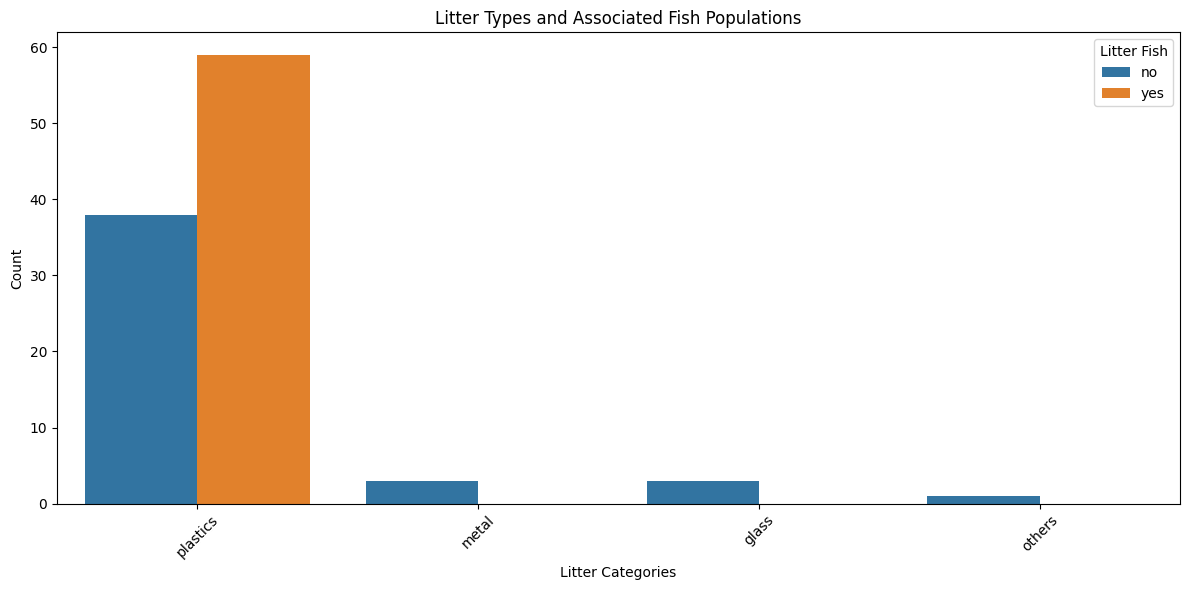

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(litter_data, x='Litter cat', hue='Litter fish')
plt.title('Litter Types and Associated Fish Populations')
plt.xlabel('Litter Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Litter Fish')
plt.tight_layout()
plt.show()

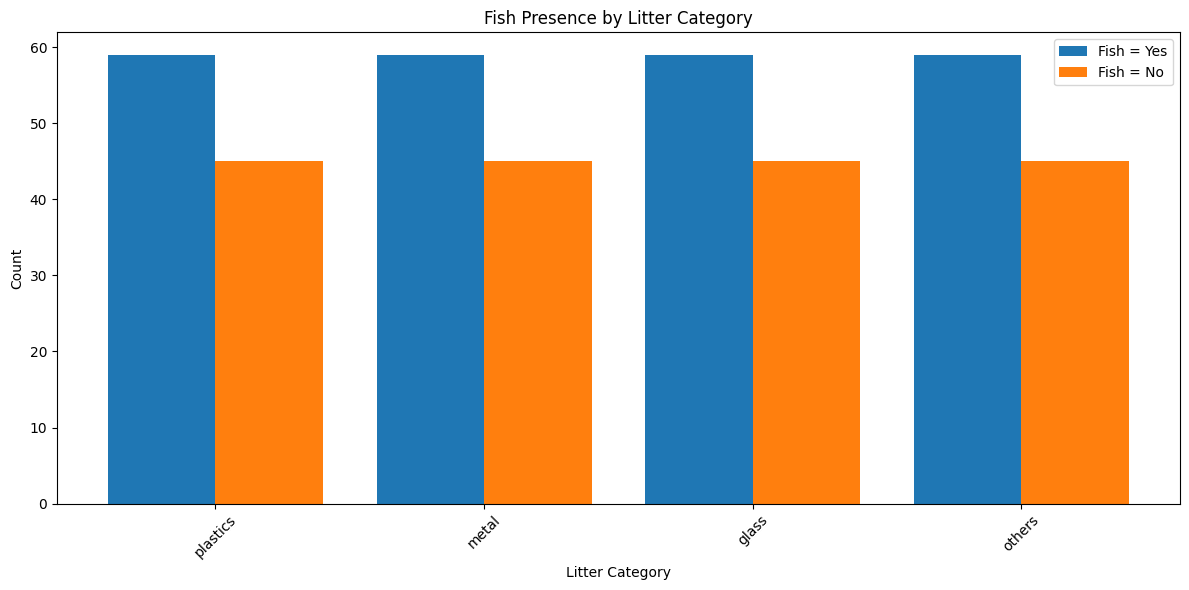

In [24]:

x = np.arange(len(categories))  # positions for bars
width = 0.4  # width of each bar

plt.figure(figsize=(12,6))
plt.bar(x - width/2, yes_counts, width=width, label='Fish = Yes')
plt.bar(x + width/2, no_counts,  width=width, label='Fish = No')  # side-by-side bars

plt.title('Fish Presence by Litter Category')
plt.xlabel('Litter Category')
plt.ylabel('Count')
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Now, **analyze how the amount of litter collected changes over time** by visualizing litter counts against the sampling date.

Convert the 'Date/Time' column to a proper datetime format using pd.to_datetime().

Extract the year (or both year and month) from the 'Date/Time' column to group and count litter occurrences over time.

period[Y-DEC]


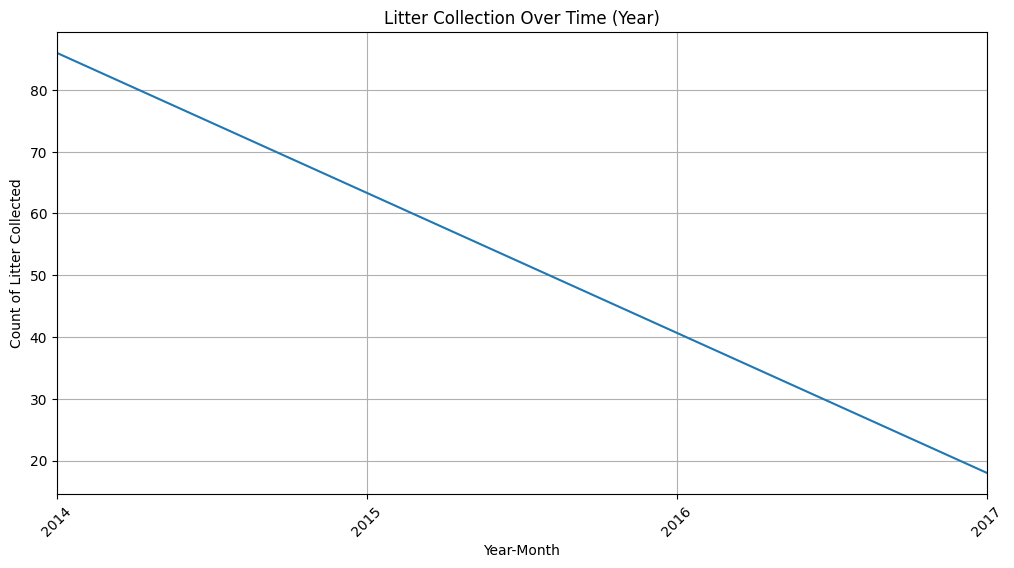

In [25]:
# Time Series Analysis of Litter Collection
litter_data['Date/Time'] = pd.to_datetime(litter_data['Date/Time'])

# Extract Year and Month and count litter occurrences by Year-Month
litter_data['Year'] = litter_data['Date/Time'].dt.to_period('Y')
print(litter_data['Year'].dtype)
litter_time_counts = litter_data['Year'].value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(12, 6))
litter_time_counts.plot()
plt.title('Litter Collection Over Time (Year)')
plt.xlabel('Year-Month')
plt.ylabel('Count of Litter Collected')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
df_group = df_sliced.groupby('Year').size().reset_index(name='Count')

This line plot displays the number of litter objects collected over time. By visualizing litter collection on a timeline, we can identify trends or spikes in litter accumulation, which may correspond to specific events or seasonal patterns, providing insights for further research or action.

Now **examine the relationship between litter objects and fish populations**. 

Create a count plot to visualize how many different types of litter objects were found in samples where fish were present. 

Start by filtering the dataset to include only those entries where Litter fish is marked as 'yes'.

/var/folders/hs/32dmfyx50snbg6rwbnbllt8434c9pj/T/ipykernel_56853/221511356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=litter_fish_data,


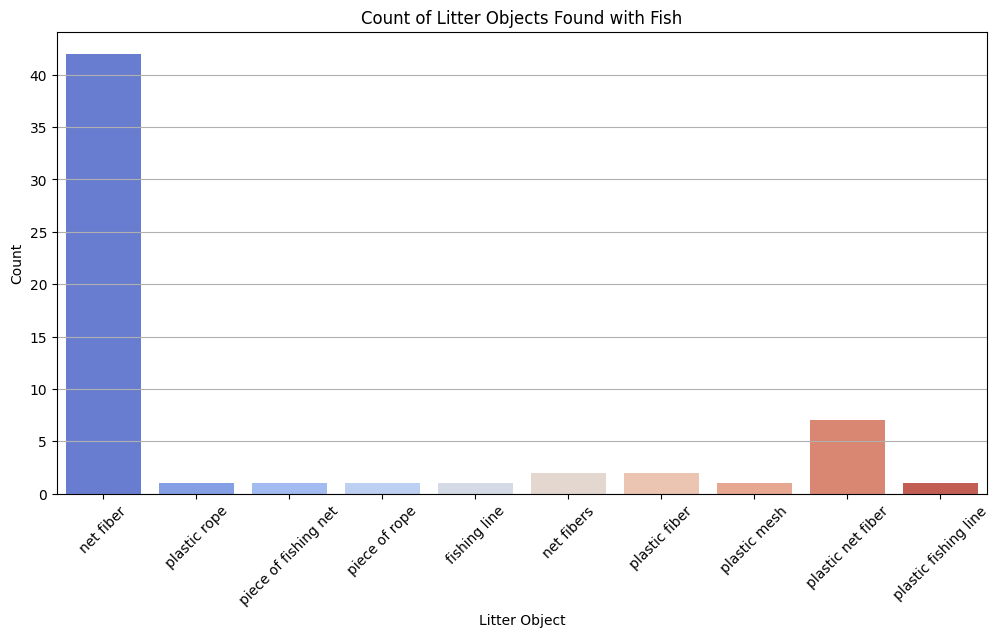

In [12]:
# Count Plot of Litter Objects Found with Fish
# Filter the dataset for entries where 'Litter fish' is 'yes'
def litter_objects_found(litter_data):
    litter_fish_data = litter_data[litter_data['Litter fish'] == 'yes']
    
    # Create a count plot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=litter_fish_data, 
                  x='Litter obj', 
                  palette='coolwarm')
    plt.title('Count of Litter Objects Found with Fish')
    plt.xlabel('Litter Object')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.grid(axis='y')
    plt.show()

litter_objects_found(litter_data)

With this graph we can see that there are multiple litter objects that have similar but not the same naming.

Before standardizing the data, verify that each litter type corresponds to a single litter category.

Filter the dataset to include only rows where fish were present, then group the data by **'Litter obj'** and display the unique **'Litter cat'** values within each group.

***Hint:*** Use **groupby()**

In [13]:
litter_fish_data = litter_data[litter_data['Litter fish'] == 'yes']
unique_items_per_group = litter_fish_data.groupby('Litter obj')['Litter cat'].unique()
unique_items_per_group 

Litter obj
fishing line            [plastics]
net fiber               [plastics]
net fibers              [plastics]
piece of fishing net    [plastics]
piece of rope           [plastics]
plastic fiber           [plastics]
plastic fishing line    [plastics]
plastic mesh            [plastics]
plastic net fiber       [plastics]
plastic rope            [plastics]
Name: Litter cat, dtype: object

With this grouping we now know that **they are all the same category = 'plastics'**, so the next step is to standarize our data.

To **standardize the values in the Litter obj column** you can use the Pandas *.replace()* method.

/var/folders/hs/32dmfyx50snbg6rwbnbllt8434c9pj/T/ipykernel_56853/221511356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=litter_fish_data,


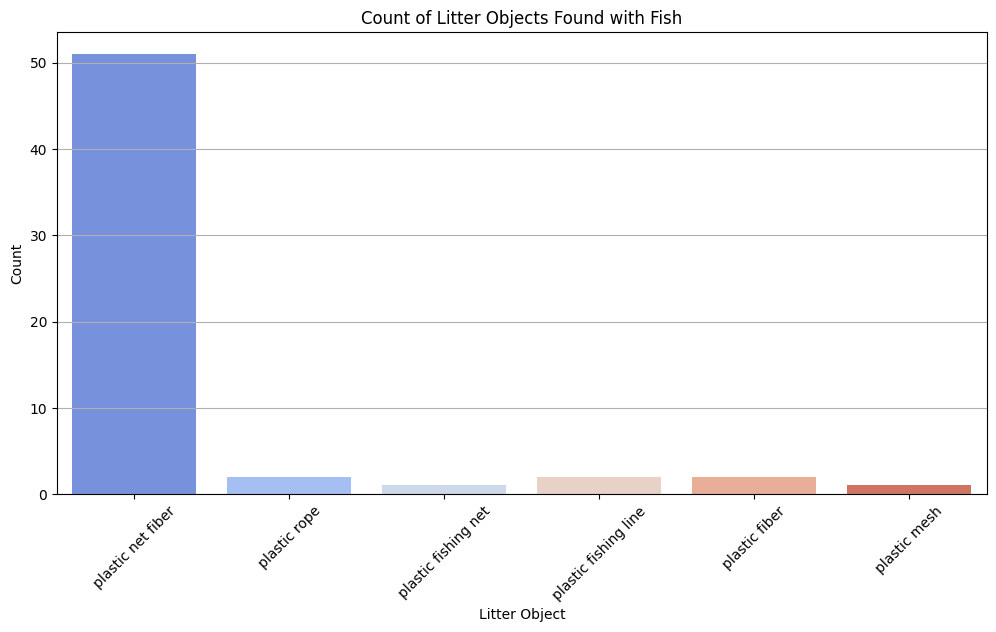

In [14]:
litter_obj_mapping = {
    'net fibers': 'plastic net fiber',
    'net fiber': 'plastic net fiber',
    'piece of rope': 'plastic rope'
}

litter_data['Litter obj'] = litter_data['Litter obj'].replace(
    {'net fibers': 'plastic net fiber',
     'net fiber': 'plastic net fiber',
     'piece of rope': 'plastic rope',
     'fishing line': 'plastic fishing line',
     'piece of fishing net': 'plastic fishing net'})

litter_objects_found(litter_data)

Next, analyze the **relationship between elevation (depth) and litter category** with a boxplot that can show how litter types are distributed across different elevations:

/var/folders/hs/32dmfyx50snbg6rwbnbllt8434c9pj/T/ipykernel_56853/507008776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=litter_data, x='Litter cat',


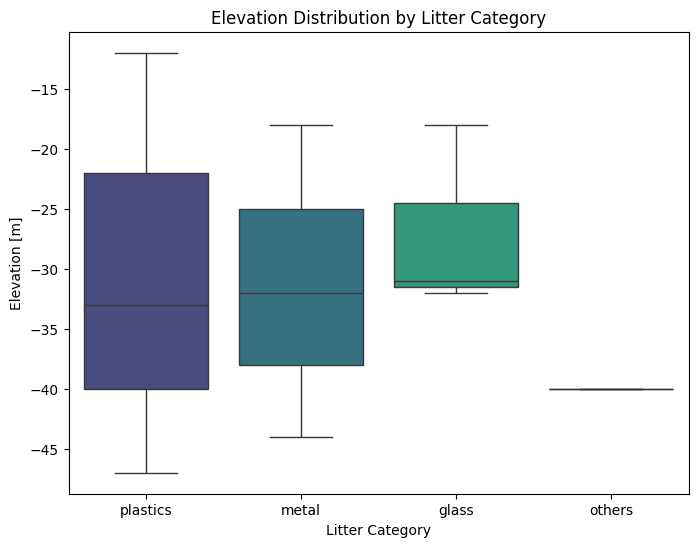

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=litter_data, x='Litter cat',
            y='Elevation [m]',
            palette='viridis')
plt.title('Elevation Distribution by Litter Category')
plt.xlabel('Litter Category')
plt.ylabel('Elevation [m]')
plt.show()